# Load and analyze the dataset

In [ ]:
# Install required packages
!pip install datasets matplotlib nltk numpy pandas wordcloud

In [2]:
from datasets import load_dataset
dataset = load_dataset("go_emotions")

print(dataset)

print(f"Training data size:{len(dataset['train'])}")
print(f"Validation data size:{len(dataset['validation'])}")
print(f"Test data size:{len(dataset['test'])}")

print(dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
Training data size:43410
Validation data size:5426
Test data size:5427
{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


## Label distribution and class imbalance

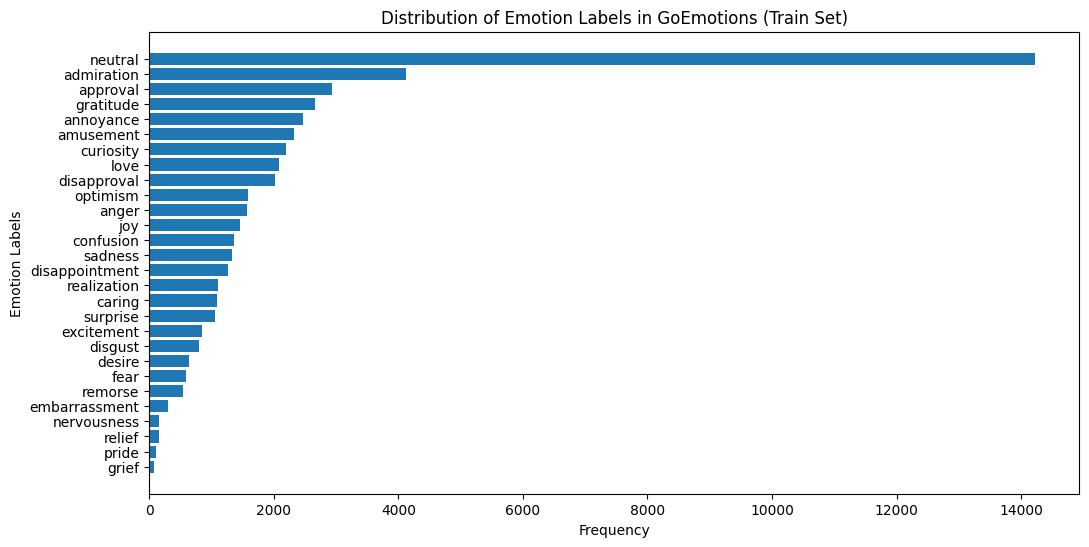

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

label_names = dataset['train'].features['labels'].feature.names

label_counts = Counter()

for x in dataset['train']:
    for label in x['labels']:
        label_counts[label] += 1

sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12,6))
plt.barh([label_names[i] for i, _ in sorted_labels], [count for _, count in sorted_labels])
plt.xlabel("Frequency")
plt.ylabel("Emotion Labels")
plt.title("Distribution of Emotion Labels in GoEmotions (Train Set)")
plt.gca().invert_yaxis()
plt.show()

         num_labels
count  43410.000000
mean       1.177217
std        0.417699
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000


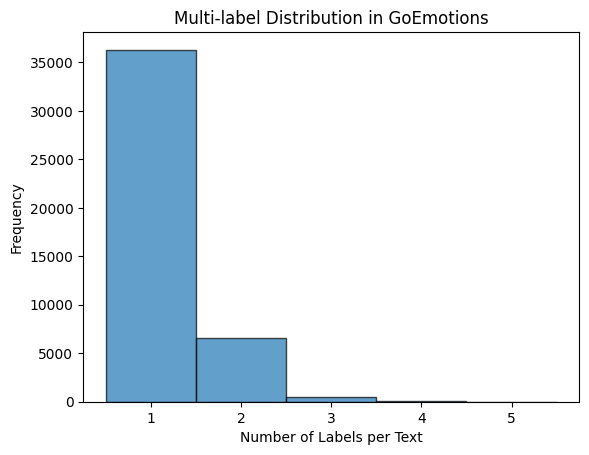

In [4]:
import pandas as pd

num_labels = [len(example["labels"]) for example in dataset['train']]
df = pd.DataFrame(num_labels, columns=["num_labels"])

print(df.describe())

plt.hist(num_labels, bins=np.arange(1, max(num_labels)+2)-0.5, edgecolor='black', alpha=0.7)
plt.xlabel("Number of Labels per Text")
plt.ylabel("Frequency")
plt.title("Multi-label Distribution in GoEmotions")
plt.xticks(range(1, max(num_labels)+1))
plt.show()

Min: 1, Max: 33, Mean: 12.840175074867542, Median: 12.0


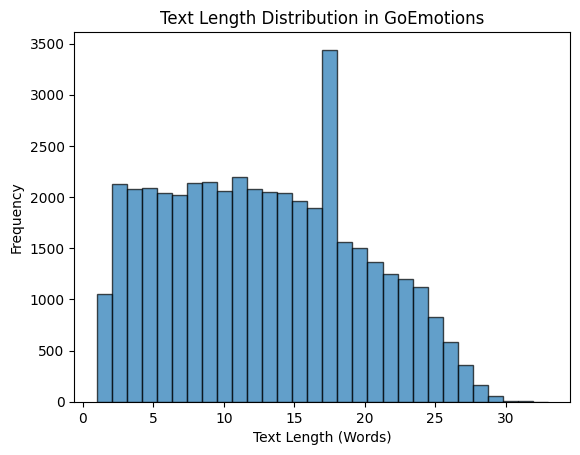

In [5]:
text_lengths = [len(example["text"].split()) for example in dataset["train"]]

print(f"Min: {np.min(text_lengths)}, Max: {np.max(text_lengths)}, Mean: {np.mean(text_lengths)}, Median: {np.median(text_lengths)}")

plt.hist(text_lengths, bins=30, alpha=0.7, edgecolor="black")
plt.xlabel("Text Length (Words)")
plt.ylabel("Frequency")
plt.title("Text Length Distribution in GoEmotions")
plt.show()

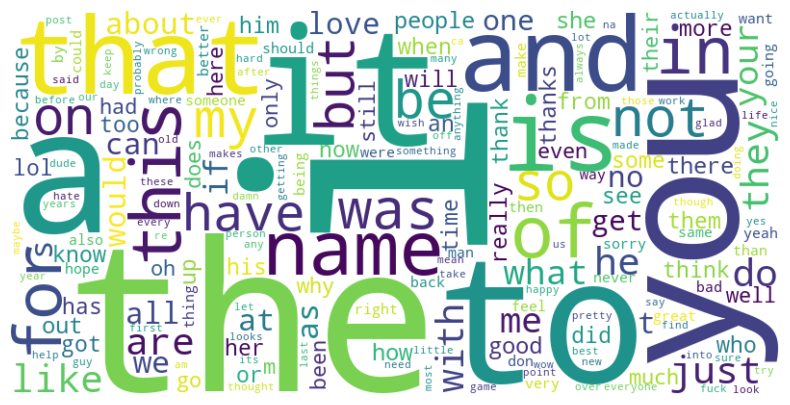

In [6]:
from wordcloud import WordCloud
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Get all text from dataset
all_text = " ".join([example["text"] for example in dataset["train"]])

# Tokenize and remove stopwords
tokens = nltk.word_tokenize(all_text)
filtered_words = [word.lower() for word in tokens if word.isalpha()]

# Use Counter to get word frequencies
word_counts = Counter(filtered_words)

# Generate word cloud using the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Show word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
print(sorted_labels[:5])  # Top 5 most frequent emotions
print(sorted_labels[-5:])  # Bottom 5 least frequent emotions

[(27, 14219), (0, 4130), (4, 2939), (15, 2662), (3, 2470)]
[(12, 303), (19, 164), (23, 153), (21, 111), (16, 77)]


In [8]:
label_names = dataset["train"].features["labels"].feature.names
top_5 = sorted_labels[:5]
bottom_5 = sorted_labels[-5:]

top_df = pd.DataFrame(top_5, columns=["Label Index", "Count"])
top_df["Emotion"] = top_df["Label Index"].apply(lambda x: label_names[x])
top_df["Type"] = "Top 5"

bottom_df = pd.DataFrame(bottom_5, columns=["Label Index", "Count"])
bottom_df["Emotion"] = bottom_df["Label Index"].apply(lambda x: label_names[x])
bottom_df["Type"] = "Bottom 5"

# Combine both
summary_df = pd.concat([top_df, bottom_df], ignore_index=True)

# Reorder columns for readability
summary_df = summary_df[["Type", "Emotion", "Label Index", "Count"]]

print(summary_df)

       Type        Emotion  Label Index  Count
0     Top 5        neutral           27  14219
1     Top 5     admiration            0   4130
2     Top 5       approval            4   2939
3     Top 5      gratitude           15   2662
4     Top 5      annoyance            3   2470
5  Bottom 5  embarrassment           12    303
6  Bottom 5    nervousness           19    164
7  Bottom 5         relief           23    153
8  Bottom 5          pride           21    111
9  Bottom 5          grief           16     77


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1007)>


Total words: 554689
Total stopwords: 278085
Stopword ratio: 0.50
Top 20 most frequent words overall:
i: 20744
the: 17983
to: 12584
a: 12328
you: 11439
it: 10625
that: 9768
and: 9026
is: 8788
name: 7904
of: 7116
this: 6547
in: 5805
for: 5737
was: 4123
my: 3779
not: 3739
but: 3672
be: 3574
on: 3542

Top stopwords in the top 20 words:
i: 20744
the: 17983
to: 12584
a: 12328
you: 11439
it: 10625
that: 9768
and: 9026
is: 8788
of: 7116
this: 6547
in: 5805
for: 5737
was: 4123
my: 3779
not: 3739
but: 3672
be: 3574
on: 3542


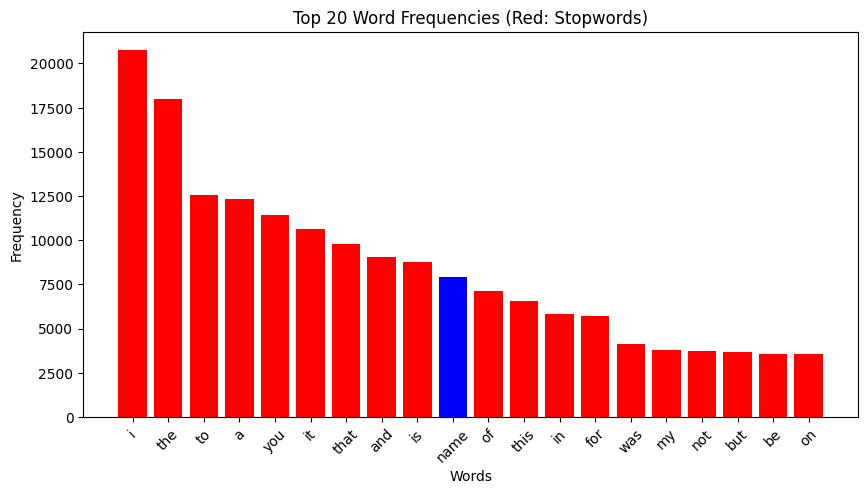

In [9]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download required resources if not already done
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))

all_words = []
for example in dataset["train"]:
    tokens = nltk.word_tokenize(example["text"])
    words = [word.lower() for word in tokens if word.isalpha()]
    all_words.extend(words)

# Create a counter for overall word frequency
word_counter = Counter(all_words)

total_words = sum(word_counter.values())

stopword_count = sum(count for word, count in word_counter.items() if word in stop_words)
stopword_ratio = stopword_count / total_words

print(f"Total words: {total_words}")
print(f"Total stopwords: {stopword_count}")
print(f"Stopword ratio: {stopword_ratio:.2f}")

# Get the top 20 most common words overall
top_20 = word_counter.most_common(20)
print("Top 20 most frequent words overall:")
for word, count in top_20:
    print(f"{word}: {count}")

# Filter out the top stopwords from the top 20 list
top_stopwords = [(word, count) for word, count in top_20 if word in stop_words]
print("\nTop stopwords in the top 20 words:")
for word, count in top_stopwords:
    print(f"{word}: {count}")

# Visualize the top 20 words, highlighting stopwords in red
words, counts = zip(*top_20)
colors = ['red' if word in stop_words else 'blue' for word in words]

plt.figure(figsize=(10,5))
plt.bar(words, counts, color=colors)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies (Red: Stopwords)")
plt.show()